# FX Volatility Fundamentals

This notebook demonstrates how to access and use the functionalities of **FX Volatility Surfaces** within the **LSEG Financial Analytics SDK**. 

FX volatility surfaces provide implied volatility data across different deltas/strikes and maturities for fx options. This enables quantitative analysis, risk management, and derivatives pricing for fx markets.

**You will be able to:**
- Configure and request volatility surface data
- Parametrize volatility models (SVI, SABR, Twin-Lognormal)
- Visualize volatility surfaces with interactive plots

## Imports

Import the following necessary modules:

- `lseg_analytics.pricing.market_data.fx_volatility` - for FX volatility surfaces construction

This notebook uses external libraries **pandas, matplotlib, IPython**; please ensure they are installed in your Python environment (e.g. 'pip install pandas') before running the code.

In [1]:
from lseg_analytics.pricing.market_data import fx_volatility as fxv

import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

## Data Preparation

Volatility surface preparation follows a structured 3-step process:

**Process Overview:**
1. **Surface Definition** - Specify the underlying instrument (fx pair)
2. **Surface Parameters** - Configure volatility model and calculation settings
3. **Request Creation** - Combine definition and parameters into a request object  

Each step builds upon the previous, creating a complete request specification for the volatility surface engine.

In [2]:
print("Step 1: Creating Surface Definition...")

currencyPair = "EURUSD"

# Create surface definition object
surface_definition = fxv.FxVolatilitySurfaceDefinition(
        instrument_code = currencyPair
        )
print(f"   ✓ Instrument: {surface_definition.instrument_code}")

print("Step 2: Configuring Surface Parameters...")
surface_parameters = fxv.FxVolatilityPricingParameters(
        calculation_date = dt.datetime.strptime("2025-01-18", "%Y-%m-%d"),
        volatility_model = fxv.CurvesAndSurfacesVolatilityModelEnum.SVI,  # Options: SVI, SABR, TWIN_LOGNORMAL
        price_side = fxv.CurvesAndSurfacesPriceSideEnum.MID,              # Options: BID, MID, ASK
        x_axis = fxv.XAxisEnum.DELTA,                                     # Options: DATE, DELTA, MONEYNESS, STRIKE, TENOR
        y_axis = fxv.YAxisEnum.TENOR                                      # Options: same as X-axis
    )
print(f"   ✓ Surface Parameters: {surface_parameters}")


print("Step 3: Create request item...")
# Create the main request object  with basic configuration
request_item = fxv.FxVolatilitySurfaceRequestItem(
        surface_tag = f"{currencyPair}_Volsurface",
        underlying_definition = surface_definition,
        surface_parameters = surface_parameters,
        underlying_type = fxv.CurvesAndSurfacesUnderlyingTypeEnum.FX,
        surface_layout = fxv.SurfaceOutput(
            format = fxv.FormatEnum.MATRIX,  # Options: LIST, MATRIX
        )
    )
print(f"   ✓ Request Item: {request_item}")

Step 1: Creating Surface Definition...
   ✓ Instrument: EURUSD
Step 2: Configuring Surface Parameters...
   ✓ Surface Parameters: {'calculationDate': '2025-01-18T00:00:00Z', 'volatilityModel': 'SVI', 'priceSide': 'Mid', 'xAxis': 'Delta', 'yAxis': 'Tenor'}
Step 3: Create request item...
   ✓ Request Item: {'surfaceTag': 'EURUSD_Volsurface', 'underlyingDefinition': {'instrumentCode': 'EURUSD'}, 'surfaceParameters': {'calculationDate': '2025-01-18T00:00:00Z', 'volatilityModel': 'SVI', 'priceSide': 'Mid', 'xAxis': 'Delta', 'yAxis': 'Tenor'}, 'underlyingType': 'Fx', 'surfaceLayout': {'format': 'Matrix'}}


In [3]:
# Execute the calculation using the calculate function
# The 'universe' parameter accepts a list of request items for batch processing
try:
    response = fxv.calculate(universe=[request_item])

    # Display response structure information
    surface_data = response['data'][0]
    if 'surface' in surface_data:
        print(f"   Calculation successful!")
        print(f"   Surface data points available: {len(surface_data['surface'])}")
    else:
        print("   No surface data found in response")
    
except Exception as e:
    print(f"   Calculation failed: {str(e)}")
    raise

   Calculation successful!
   Surface data points available: 18


## Results Display

In [4]:
vol_surface = response['data'][0]['surface']
expiries = vol_surface[0][1:]
deltas = []
values = []
for row in vol_surface[1:]:
    deltas.append(row[0])
    values.append(row[1:])

deltas = [round(float(delta), 2) if isinstance(delta, (int, float)) else delta for delta in deltas]

surface_df = pd.DataFrame(values, index=deltas, columns=expiries).T
display(surface_df)

,-0.1,-0.15,-0.2,-0.25,-0.3,-0.35,-0.4,-0.45,ATM,0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1
ON,5.640750,5.584350,5.541246,5.506205,5.477292,5.454296,5.438668,5.433955,5.445000,5.473759,5.517192,5.571308,5.634222,5.706245,5.789789,5.890386,6.020793
SW,11.802195,11.476825,11.237855,11.049857,10.897084,10.771334,10.667898,10.583838,10.517500,10.466771,10.430212,10.407171,10.396960,10.399443,10.415447,10.447699,10.503622
2W,11.573301,11.204673,10.948019,10.754204,10.601115,10.476913,10.374569,10.289638,10.220000,10.162684,10.116073,10.080444,10.055952,10.043615,10.045856,10.067913,10.122323
1M,10.225099,9.883710,9.637069,9.445151,9.289829,9.161350,9.053887,8.963705,8.890000,8.828749,8.777744,8.737985,8.709226,8.691801,8.686958,8.697748,8.731784
2M,9.961052,9.584782,9.306162,9.084461,8.901512,8.747805,8.617838,8.508118,8.420000,8.346285,8.282755,8.231567,8.191163,8.160236,8.137878,8.123837,8.119240
3M,9.857496,9.503020,9.231938,9.007984,8.814852,8.644118,8.491378,8.354809,8.242318,8.145143,8.059311,7.992775,7.943158,7.906564,7.879137,7.857807,7.840230
6M,9.999988,9.541274,9.193318,8.908183,8.664362,8.450728,8.261342,8.093402,7.964207,7.851055,7.741375,7.653189,7.584337,7.531223,7.489906,7.456865,7.429084
9M,10.457737,9.843459,9.387840,9.024019,8.722188,8.466900,8.249497,8.064847,7.937500,7.827849,7.714406,7.623386,7.551945,7.497361,7.457383,7.430667,7.417684
1Y,10.617959,9.927737,9.424523,9.029313,8.706353,8.436515,8.208500,8.015197,7.890000,7.780348,7.656761,7.557410,7.481553,7.429431,7.402833,7.406616,7.453487
2Y,10.853697,10.118118,9.591393,9.185187,8.859138,8.591286,8.368315,8.181538,8.025000,7.894509,7.787118,7.700874,7.634758,7.588845,7.564830,7.567486,7.609287


### Volatility Smile

Text(0, 0.5, 'Volatility')

<Figure size 640x480 with 0 Axes>

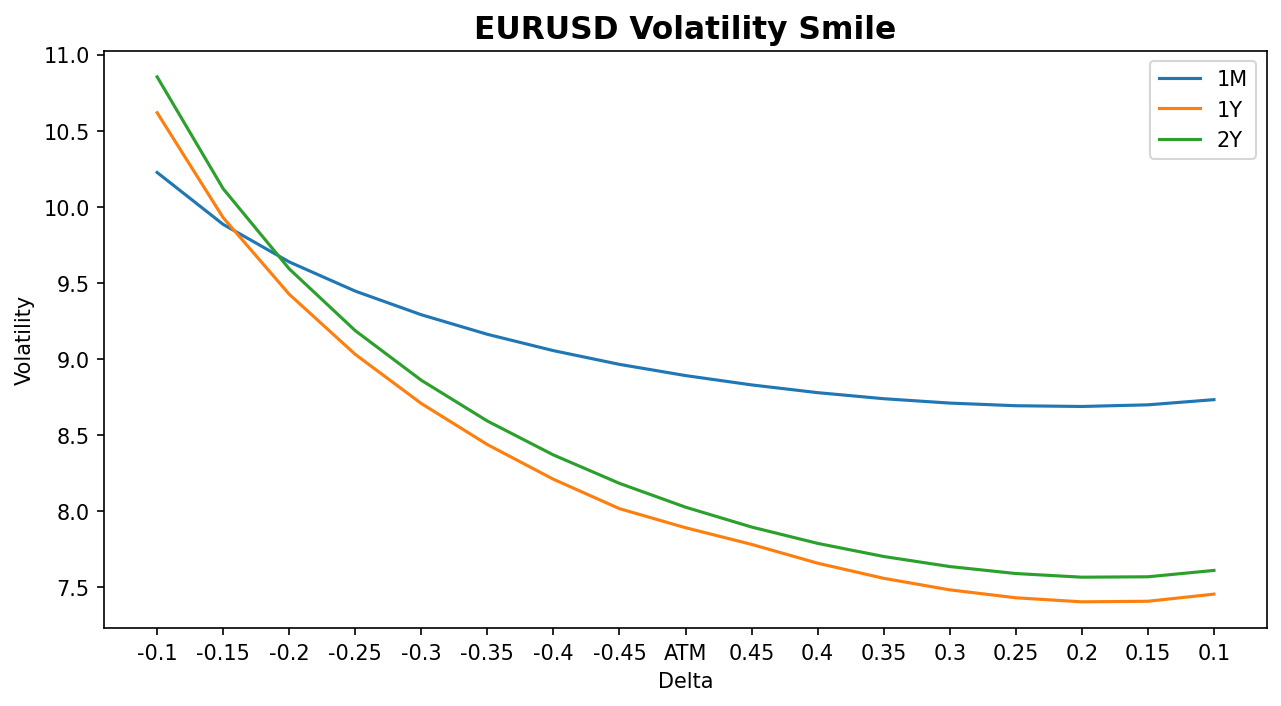

In [5]:
plt.figure()
plt.figure(figsize=(10, 5), dpi=150)
for tenor in ["1M", "1Y", "2Y"]:
    plt.plot(surface_df.columns.map(str), surface_df.T[tenor], label = tenor)
plt.title(f"{currencyPair} Volatility Smile", fontdict={'fontweight':'bold','fontsize':15})
plt.legend(loc='upper right')
plt.xlabel('Delta')
plt.ylabel('Volatility')

### Available Classes and Functions in fx_volatility Module

The following is a complete list of all classes, enums, and functions available after importing from `lseg_analytics.pricing.market_data.fx_volatility`:

**Core Classes:**
- `FxVolatilitySurfaceDefinition` - Define underlying instrument specifications
- `FxVolatilityPricingParameters` - Configure volatility model parameters and settings
- `FxVolatilitySurfaceRequestItem` - Main request object for surface calculation

**Response Classes:**
- `VolatilitySurfaceResponse` - Main response container
- `VolatilitySurfaceResponseItem` - Individual surface response
- `VolatilitySurfacePoint` - Individual volatility data point
- `SurfaceOutput` - Output configuration and formatting

**Configuration Enums:**
- `CurvesAndSurfacesVolatilityModelEnum` - Volatility models (SVI, SABR, TWIN_LOGNORMAL, etc.)
- `CurvesAndSurfacesPriceSideEnum` - Price side selection (BID, ASK, MID)
- `CurvesAndSurfacesFxSwapCalculationMethodEnum` - FX Swap calulation method (DepositCcy1ImpliedFromFxSwap, DepositCcy2ImpliedFromFxSwap, FxSwap, FxSwapImpliedFromDeposit)
- `CurvesAndSurfacesTimeStampEnum` - Time stamp options (CLOSE, OPEN, DEFAULT, etc.)
- `XAxisEnum` & `YAxisEnum` - Surface layout axis configuration

**Main Functions:**
- `calculate()` - Execute volatility surface calculations
- `functions_all` - List all available functions